<a href="https://colab.research.google.com/github/Sinem-B62/unsupervised-ml-colab/blob/main/Unsupervised_Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning-Projekt: Klassifizierungsmodell (Unsupervised)**

#**Projektbeschreibung** ⛳

Ziel dieses Projekts ist es, das Fahrzeugklassifizierungsproblem von Prospect Auto mithilfe eines unüberwachten Lernverfahrens zu untersuchen. Dazu wird die Datenkomplexität zunächst mit einer Hauptkomponentenanalyse (PCA) reduziert. Anschließend werden die Fahrzeuge mithilfe von K-Means-Clustering in Gruppen eingeteilt. Zum Schluss wird bewertet, ob dieser unüberwachte Ansatz eine sinnvolle und effiziente Ergänzung oder Alternative zu einem zuvor eingesetzten überwachten Modell darstellt.

#**Data Import & Cleaning ✍**

In [ ]:
# Datenmanipulation
import pandas as pd
import numpy as np

# Visualisierung
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning mit Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vehicle_ML_Projekt.csv to vehicle_ML_Projekt.csv


In [ ]:
# Einlesen der Daten
df = pd.read_csv("vehicle_ML_Projekt.csv", sep=";")

In [ ]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
radius_ratio,6
skewness_about,6
circularity,5
scaled_radius_of_gyration.1,4
distance_circularity,4
scaled_variance,3
pr.axis_rectangularity,3
scaled_variance.1,2
scaled_radius_of_gyration,2
pr.axis_aspect_ratio,2


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
compactness,0
circularity,0
distance_circularity,0
radius_ratio,0
pr.axis_aspect_ratio,0
max.length_aspect_ratio,0
scatter_ratio,0
elongatedness,0
pr.axis_rectangularity,0
max.length_rectangularity,0


In [ ]:
df.shape

(813, 19)

In [ ]:
float_cols = df.select_dtypes(include='float64').columns

for col in float_cols:
    df[col] = np.rint(df[col]).astype('Int64')

print(df.dtypes)


compactness                     int64
circularity                     Int64
distance_circularity            Int64
radius_ratio                    Int64
pr.axis_aspect_ratio            Int64
max.length_aspect_ratio         int64
scatter_ratio                   Int64
elongatedness                   Int64
pr.axis_rectangularity          Int64
max.length_rectangularity       int64
scaled_variance                 Int64
scaled_variance.1               Int64
scaled_radius_of_gyration       Int64
scaled_radius_of_gyration.1     Int64
skewness_about                  Int64
skewness_about.1                Int64
skewness_about.2                Int64
hollows_ratio                   int64
class                          object
dtype: object


In [ ]:
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,car
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,car
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,car
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,car


#**Vorbereitung des Modells 🆎**

Trennen von Features und Labels: Damit klar ist, welche Spalten nur Eingaben sind und welche die Zielvariable darstellen.

Train-Test-Split: Sicherstellen, dass das Modell nicht nur die Trainingsdaten auswendig lernt, sondern auch bei neuen Daten funktioniert.

Standardisierung: Verhindert, dass große Wertebereiche die Berechnungen dominieren – besonders wichtig für Verfahren wie PCA und K-Means.

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

X_train_standardized = scaler.fit_transform(X_train)

X_test_standardized = scaler.transform(X_test)

#**Hauptkomponentenanalyse PCA**

Hauptkomponentenanalyse zur Dimensionsreduktion

Ziel: Wir haben 18 numerische Features. Viele davon sind korreliert, was die Analyse komplizierter und rechenintensiver macht. Mit PCA können wir die Daten "verdichten" und dabei möglichst viel Information (Varianz) behalten.

Mehrwert: Weniger Dimensionen = schnellere Berechnung, weniger Rauschen, und Muster wie Cluster lassen sich besser erkennen.

*Unüberwacht: PCA nutzt keine Labels, sondern rein die Struktur der Daten → daher perfekt, um Daten vorzubereiten, bevor man z. B. K-Means anwendet.*

###**Auswahl der PCA-Komponenten**
Hier wurde k=5 gewählt, da ca. 90% der Varianz abgedeckt sind. Damit reduzieren wir die Daten von 18 Features auf 5 "verdichtete" Hauptkomponenten.

Transformation der Trainings- und Testdaten
fit_transform: passt das PCA an und wendet es auf die Trainingsdaten an
transform: nutzt die gelernten PCA-Komponenten auch für die Testdaten.

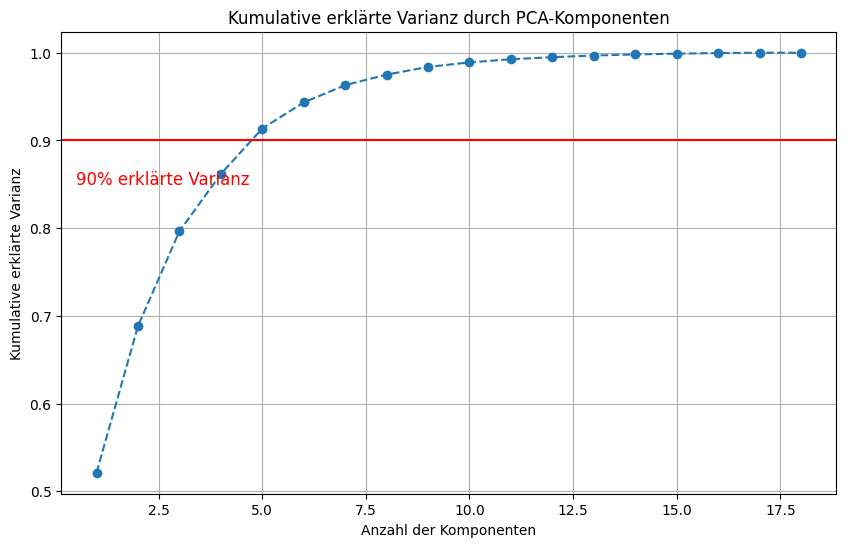

In [ ]:
pca_analyzer = PCA(n_components=18)

pca_analyzer.fit(X_train_standardized)

explained_variance = pca_analyzer.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 19), cumulative_variance, marker='o', linestyle='--')
plt.title('Kumulative erklärte Varianz durch PCA-Komponenten')
plt.xlabel('Anzahl der Komponenten')
plt.ylabel('Kumulative erklärte Varianz')
plt.grid(True)

plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% erklärte Varianz', color = 'red', fontsize=12)
plt.show()

In [ ]:
k = 5

pca_final = PCA(n_components=k)

X_train_pca = pca_final.fit_transform(X_train_standardized)
X_test_pca = pca_final.transform(X_test_standardized)

print("Ursprüngliche Form der Trainingsdaten:", X_train_standardized.shape)
print("Form der Trainingsdaten nach PCA:", X_train_pca.shape)

Ursprüngliche Form der Trainingsdaten: (650, 18)
Form der Trainingsdaten nach PCA: (650, 5)


#**K-Means Analyse**

K-Means Analyse Clustering der Daten

Ziel: Die Daten in Gruppen (Cluster) einteilen, ohne Labels zu verwenden.

Ellbogenmethode (k finden):
Für k = 1…10 wird K-Means trainiert und die Trägheit (Inertia) gemessen. Inertia sinkt immer, aber der Knick (“Ellbogen”) zeigt, ab wann weitere Cluster nur noch wenig Zusatznutzen bringen.

Wahl von k:
Aus dem Plot ist der Knick bei k = 5 erkennbar. Deshalb wählen wir 5 Cluster als guten Kompromiss zwischen Genauigkeit und Einfachheit.

Mit k = 5 wird K-Means endgültig trainiert. Jeder Datensatz erhält eine Cluster-Zugehörigkeit (Label 0–4).

Die Punkte werden im PCA-Raum (PC1 vs. PC2) farbig dargestellt; die roten “X” markieren die Zentroiden (Mittelpunkte) der Cluster. So sieht man die Aufteilung intuitiv.

**Silhouette-Score:**

Der Silhouette-Score ≈ 0.289 zeigt: Die Cluster sind erkennbar, aber nicht stark getrennt Es gibt eine gewisse Struktur, die Cluster sind also nicht völlig zufällig.
Aber: Die Trennung ist nicht sehr klar → die Cluster überschneiden sich teilweise.

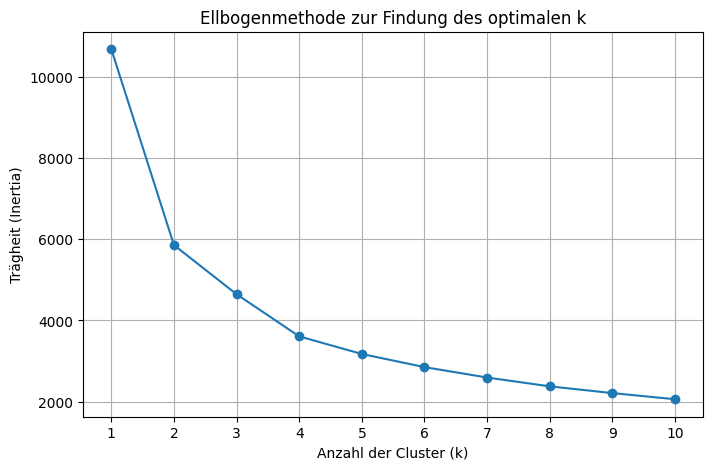

In [ ]:
inertia = []

k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Ellbogenmethode zur Findung des optimalen k')
plt.xlabel('Anzahl der Cluster (k)')
plt.ylabel('Trägheit (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('elbow_plot.png')

In [ ]:
optimal_k = 5

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

train_cluster_labels = kmeans_final.fit_predict(X_train_pca)

test_cluster_labels = kmeans_final.predict(X_test_pca)

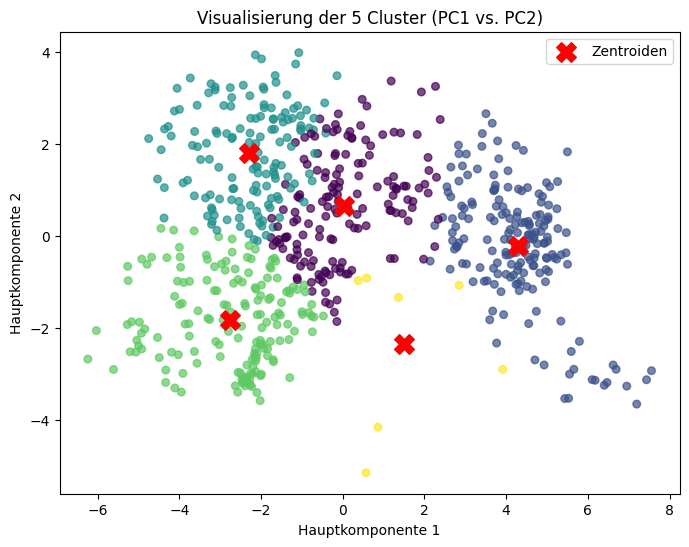

In [ ]:

optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
train_cluster_labels = kmeans_final.fit_predict(X_train_pca)


plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=train_cluster_labels, cmap='viridis', s=30, alpha=0.7)

centers = kmeans_final.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, marker='X', label='Zentroiden')

plt.title("Visualisierung der 5 Cluster (PC1 vs. PC2)")
plt.xlabel("Hauptkomponente 1")
plt.ylabel("Hauptkomponente 2")
plt.legend()
plt.show()


In [ ]:
silhouette_pca = silhouette_score(X_train_pca, train_cluster_labels)
print(f"Silhouette Score (nach PCA): {silhouette_pca:.3f}")

Silhouette Score (nach PCA): 0.289


#**Schlussfolgerung: Überwacht vs. Unüberwacht** 💡

In diesem Datensatz liegt bereits eine klare Zielvariable vor, die beschreibt, ob ein Fahrzeug ein Bus, Van oder Car ist. Genau hier spielt ein überwachtes Modell seine Stärke aus: Es kann anhand der 18 numerischen Merkmale lernen, wie sich die Fahrzeugtypen unterscheiden, und anschließend sehr zuverlässig neue Fahrzeuge einer der drei Klassen zuordnen. Der große Vorteil ist, dass man die Modellgüte mit klaren Metriken wie Accuracy oder F1-Score messen kann. Damit lässt sich eindeutig beurteilen, wie gut das Modell funktioniert.

Ein unüberwachtes Modell – wie z. B. K-Means – ist zwar hilfreich, um die Daten ohne Vorkenntnis zu erkunden und mögliche Strukturen oder Cluster zu erkennen, jedoch bleibt unklar, ob diese Cluster auch wirklich mit den bekannten Klassen (Bus, Van, Car) übereinstimmen. Die Bewertung ist schwieriger, da interne Metriken wie der Silhouette-Score keine direkte Aussage über die Trennschärfe der tatsächlichen Klassen liefern.

Für diesen Anwendungsfall ist deshalb ein überwachtes Modell eindeutig besser geeignet, da es die vorhandenen Labels nutzt, um ein präzises und objektiv bewertbares Vorhersagemodell zu entwickeln. Das unüberwachte Vorgehen bietet zwar einen Mehrwert zur explorativen Analyse – zum Beispiel, um Ähnlichkeiten zwischen Fahrzeugen sichtbar zu machen – doch für eine zuverlässige Klassifikation bringt das überwachte Modell den klaren Mehrwert: es liefert konkrete, überprüfbare Vorhersagen und unterstützt somit praktisch nutzbare Entscheidungen.